In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics.pairwise import cosine_similarity
df = pd.read_csv("dataset.csv")
print("Dataset Loaded Successfully!")
print(df.head())

Dataset Loaded Successfully!
   index                 title      artist        top genre  year  bpm  nrgy  \
0      1      Hey, Soul Sister       Train       neo mellow  2010   97    89   
1      2  Love The Way You Lie      Eminem  detroit hip hop  2010   87    93   
2      3               TiK ToK       Kesha        dance pop  2010  120    84   
3      4           Bad Romance   Lady Gaga        dance pop  2010  119    92   
4      5  Just the Way You Are  Bruno Mars              pop  2010  109    84   

   dnce  dB  live  val  dur  acous  spch  pop  
0    67  -4     8   80  217     19     4   83  
1    75  -5    52   64  263     24    23   82  
2    76  -3    29   71  200     10    14   80  
3    70  -4     8   71  295      0     4   79  
4    64  -5     9   43  221      2     4   78  


In [2]:
print(df.columns.tolist())

['index', 'title', 'artist', 'top genre', 'year', 'bpm', 'nrgy', 'dnce', 'dB', 'live', 'val', 'dur', 'acous', 'spch', 'pop']


In [3]:
df.info

<bound method DataFrame.info of      index                                              title  \
0        1                                   Hey, Soul Sister   
1        2                               Love The Way You Lie   
2        3                                            TiK ToK   
3        4                                        Bad Romance   
4        5                               Just the Way You Are   
..     ...                                                ...   
598    599                Find U Again (feat. Camila Cabello)   
599    600      Cross Me (feat. Chance the Rapper & PnB Rock)   
600    601  No Brainer (feat. Justin Bieber, Chance the Ra...   
601    602    Nothing Breaks Like a Heart (feat. Miley Cyrus)   
602    603                                   Kills You Slowly   

               artist        top genre  year  bpm  nrgy  dnce  dB  live  val  \
0               Train       neo mellow  2010   97    89    67  -4     8   80   
1              Eminem  detr

In [3]:
print(df.isnull().sum())

index        0
title        0
artist       0
top genre    0
year         0
bpm          0
nrgy         0
dnce         0
dB           0
live         0
val          0
dur          0
acous        0
spch         0
pop          0
dtype: int64


In [11]:
duplicate_rows = df[df.duplicated(keep='first')]
df = df.drop_duplicates()

In [13]:
audio_features = [
    'bpm', 'nrgy', 'dnce', 'dB', 'live',
    'val', 'dur', 'acous', 'spch', 'pop'
]

# Safety check (good for coursework)
missing_cols = [col for col in audio_features if col not in df.columns]
if missing_cols:
    print("Missing columns:", missing_cols)
else:
    print("All required audio features found.")

df_features = df[audio_features]

# NORMALIZE FEATURES
scaler = MinMaxScaler()
normalized_features = scaler.fit_transform(df_features)

#COSINE SIMILARITY
similarity_matrix = cosine_similarity(normalized_features)

#Recommendation System
def recommend_songs(song_title, top_n=5):
    if song_title not in df['title'].values:
        return "Song not found in dataset."

    song_index = df[df['title'] == song_title].index[0]

    similarity_scores = list(enumerate(similarity_matrix[song_index]))
    similarity_scores = sorted(similarity_scores, key=lambda x: x[1], reverse=True)

    # Exclude the selected song itself
    similarity_scores = similarity_scores[1:top_n+1]

    recommended_indices = [i[0] for i in similarity_scores]

    return df[['title', 'artist']].iloc[recommended_indices]

# TEST THE SYSTEM
song_name = input("Enter a song title: ")
recommendations = recommend_songs(song_name)

print("\nRecommended Songs:")
print(recommendations)

All required audio features found.


Enter a song title:  baby



Recommended Songs:
Song not found in dataset.


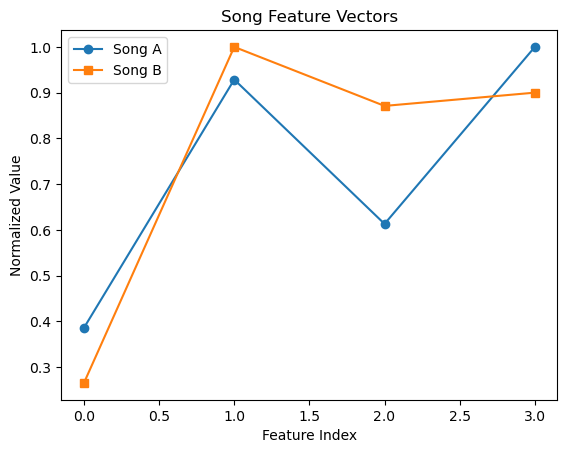

In [6]:
import matplotlib.pyplot as plt

song_a = normalized[0]
song_b = normalized[1]

plt.figure()
plt.plot(song_a, marker='o', label="Song A")
plt.plot(song_b, marker='s', label="Song B")
plt.title("Song Feature Vectors")
plt.xlabel("Feature Index")
plt.ylabel("Normalized Value")
plt.legend()
plt.show()


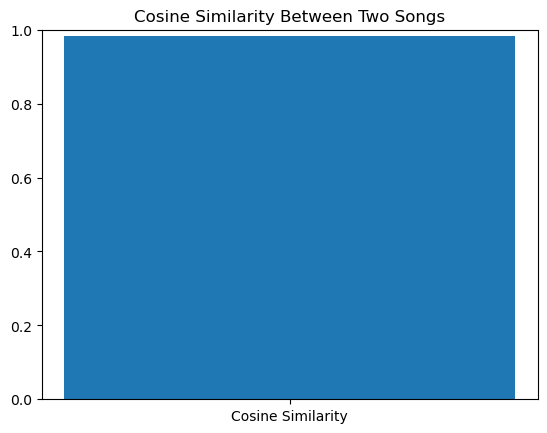

Cosine Similarity Score: 0.9820926657007557


In [7]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

vec1 = normalized[0].reshape(1, -1)
vec2 = normalized[1].reshape(1, -1)

similarity = cosine_similarity(vec1, vec2)

plt.figure()
plt.bar(["Cosine Similarity"], similarity[0])
plt.ylim(0,1)
plt.title("Cosine Similarity Between Two Songs")
plt.show()

print("Cosine Similarity Score:", similarity[0][0])


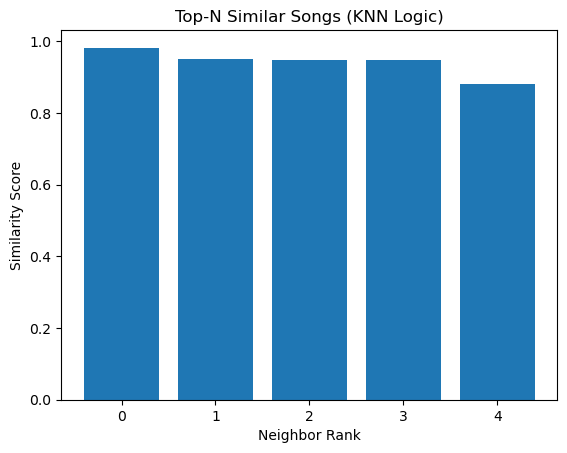

In [8]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

similarity_matrix = cosine_similarity(normalized)
song_index = 0

scores = similarity_matrix[song_index]
top_indices = np.argsort(scores)[::-1][1:6]
top_scores = scores[top_indices]

plt.figure()
plt.bar(range(len(top_scores)), top_scores)
plt.title("Top-N Similar Songs (KNN Logic)")
plt.xlabel("Neighbor Rank")
plt.ylabel("Similarity Score")
plt.show()


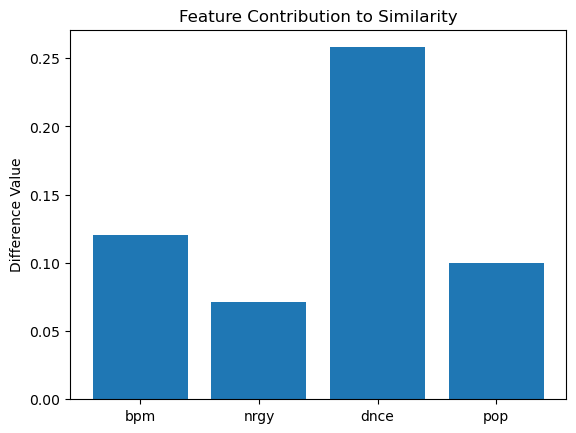

In [9]:
import pandas as pd

feature_names = features
contribution = abs(song_a - song_b)

plt.figure()
plt.bar(feature_names, contribution)
plt.title("Feature Contribution to Similarity")
plt.ylabel("Difference Value")
plt.show()


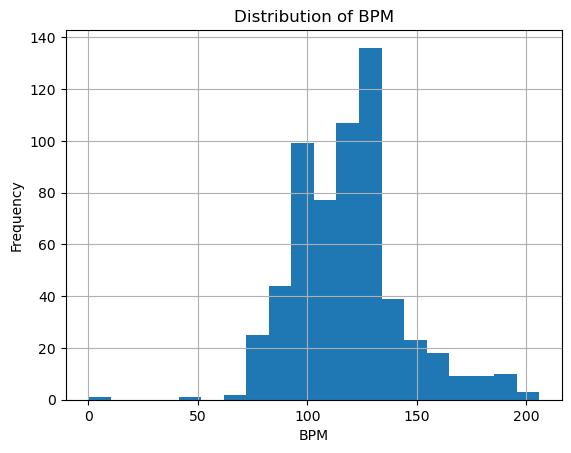

In [10]:

plt.figure()
df['bpm'].hist(bins=20)
plt.title("Distribution of BPM")
plt.xlabel("BPM")
plt.ylabel("Frequency")
plt.show()

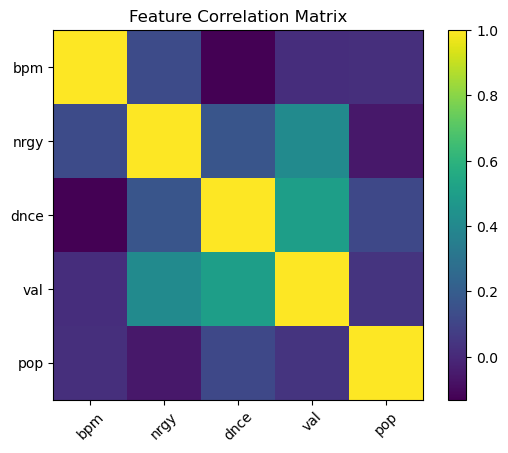

In [11]:
import matplotlib.pyplot as plt
import numpy as np

features = ['bpm', 'nrgy', 'dnce', 'val', 'pop']
corr = df[features].corr()

plt.figure()
plt.imshow(corr)
plt.colorbar()
plt.xticks(range(len(features)), features, rotation=45)
plt.yticks(range(len(features)), features)
plt.title("Feature Correlation Matrix")
plt.show()


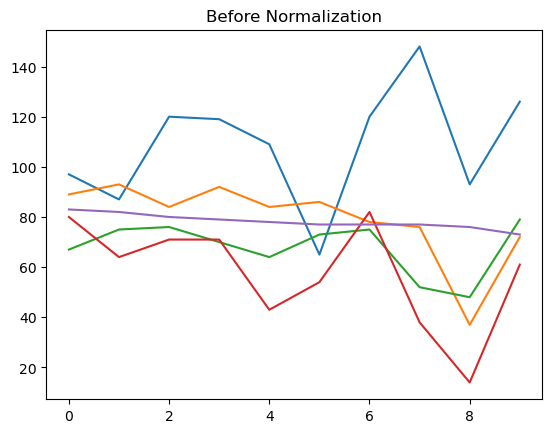

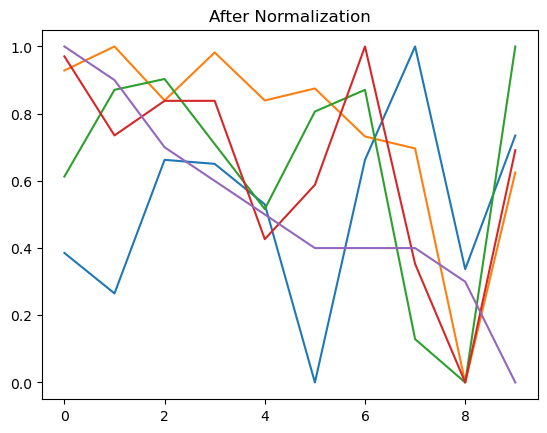

In [12]:
from sklearn.preprocessing import MinMaxScaler

sample = df[features].head(10)
scaler = MinMaxScaler()
normalized = scaler.fit_transform(sample)

plt.figure()
plt.plot(sample.values)
plt.title("Before Normalization")
plt.show()

plt.figure()
plt.plot(normalized)
plt.title("After Normalization")
plt.show()
